In [1]:
# Libraries
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
Forza_data = pd.read_excel("Forza Purchase bills.xlsx")
induja_data = pd.read_excel("Induja Purchase Bills.xlsx")


In [5]:
Forza_data.head()

,Sl. No.,Number,Invoice,Name,Document Date,Packing slip,Batch number,Product Receipt Date,Item number,Unit,...,Location,Quantity,Physical cost amount,Financial cost amount,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1.0,PO-00007670,P504,Forza Industries P Ltd,2017-11-08,P504,171115-00061,2017-11-08,P00000507-AV,Nos,...,RX-COM,150.0,9600.0,9600.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,PO-00007670,P490,Forza Industries P Ltd,2017-11-08,P490,171108-00109,2017-11-08,P00000278-AV,Nos,...,RX-COM,250.0,11625.0,11625.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,PO-00007670,P496,Forza Industries P Ltd,2017-11-08,P496,171108-00111,2017-11-08,P00000280-AV,Nos,...,RX-COM,100.0,2750.0,2750.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,PO-00007670,P490,Forza Industries P Ltd,2017-11-08,P490,171108-00108,2017-11-08,P00000277-AV,Nos,...,RX-COM,1000.0,22000.0,22000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,PO-00007670,P496,Forza Industries P Ltd,2017-11-08,P496,171108-00110,2017-11-08,P00000275-AV,Nos,...,RX-COM,600.0,11400.0,11400.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
induja_data.head()

,Sl. No.,Number,Invoice,Name,Document Date,Packing slip,Batch number,Product Receipt Date,Item number,Unit,...,Location,Quantity,Physical cost amount,Financial cost amount,Invoice\nQTY,Differnce\nin QTY,Invoice\nCost Price,Differnce\nin Cost Price,Actual\nCost Amount,Diffence\nin Cost Amount in Invoice
0,1.0,PO-00000328,213,Indujaa Press Components,2017-03-11,213,170408-00138,2017-04-08,REZ003756-PQ,Nos,...,RX-EMS,2000,3800.0,3800.0,1500.0,500.0,2.65,-0.75,3975.0,-175.0
1,2.0,PO-00011916,G56,Indujaa Press Components,2018-05-17,G56,180611-00013,2018-05-21,REZ003756-PQ,Nos,...,RX-EMS,400,760.0,760.0,550.0,-150.0,2.10,-0.20,1155.0,-395.0
2,3.0,PO-00015698,G101,Indujaa Press Components,NaT,G101,180802-00136,NaT,REZ003756-PQ,Nos,...,RX-EMS,400,760.0,760.0,800.0,-400.0,2.00,-0.10,1600.0,-840.0
3,4.0,PO-00012866,G58,Indujaa Press Components,2018-06-05,G58,180611-00012,2018-06-11,REZ003756-PQ,Nos,...,RX-EMS,650,1235.0,1235.0,700.0,-50.0,1.00,0.90,700.0,535.0
4,5.0,PO-00015337,IPC-109,Indujaa Press Components,2019-04-25,IPC-109,190920-00043,2019-05-08,REZ003756-PQ,Nos,...,RX-EMS,700,1330.0,1330.0,650.0,50.0,0.50,1.40,325.0,1005.0


In [7]:
Forza_data.columns.difference(induja_data.columns)

Index(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [8]:
Forza_data.shape

(1249, 27)

In [9]:
Forza = Forza_data 
induja = induja_data

In [10]:
Forza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sl. No.                1247 non-null   float64       
 1   Number                 1247 non-null   object        
 2   Invoice                1241 non-null   object        
 3   Name                   1247 non-null   object        
 4   Document Date          1087 non-null   datetime64[ns]
 5   Packing slip           1247 non-null   object        
 6   Batch number           1247 non-null   object        
 7   Product Receipt Date   1156 non-null   datetime64[ns]
 8   Item number            1247 non-null   object        
 9   Unit                   1247 non-null   object        
 10  Financial date         1247 non-null   datetime64[ns]
 11  Physical date          1247 non-null   datetime64[ns]
 12  Purchase Price         1247 non-null   float64       
 13  Cur

In [11]:
Forza.isna().sum()

Sl. No.                     2
Number                      2
Invoice                     8
Name                        2
Document Date             162
Packing slip                2
Batch number                2
Product Receipt Date       93
Item number                 2
Unit                        2
Financial date              2
Physical date               2
Purchase Price              2
Currency                    2
Line Amount                 2
Item Description            2
Warehouse                   2
Location                    2
Quantity                    1
Physical cost amount        1
Financial cost amount       9
Unnamed: 21              1221
Unnamed: 22              1220
Unnamed: 23              1221
Unnamed: 24              1221
Unnamed: 25              1221
Unnamed: 26              1221
dtype: int64

In [12]:
Forza["source"] = "Forza"
induja["source"] = "induja"

In [13]:
Forza

,Sl. No.,Number,Invoice,Name,Document Date,Packing slip,Batch number,Product Receipt Date,Item number,Unit,...,Quantity,Physical cost amount,Financial cost amount,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,source
0,1.0,PO-00007670,P504,Forza Industries P Ltd,2017-11-08,P504,171115-00061,2017-11-08,P00000507-AV,Nos,...,150.0,9600.0,9600.0,NaN,NaN,NaN,NaN,NaN,NaN,Forza
1,2.0,PO-00007670,P490,Forza Industries P Ltd,2017-11-08,P490,171108-00109,2017-11-08,P00000278-AV,Nos,...,250.0,11625.0,11625.0,NaN,NaN,NaN,NaN,NaN,NaN,Forza
2,3.0,PO-00007670,P496,Forza Industries P Ltd,2017-11-08,P496,171108-00111,2017-11-08,P00000280-AV,Nos,...,100.0,2750.0,2750.0,NaN,NaN,NaN,NaN,NaN,NaN,Forza
3,4.0,PO-00007670,P490,Forza Industries P Ltd,2017-11-08,P490,171108-00108,2017-11-08,P00000277-AV,Nos,...,1000.0,22000.0,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,Forza
4,5.0,PO-00007670,P496,Forza Industries P Ltd,2017-11-08,P496,171108-00110,2017-11-08,P00000275-AV,Nos,...,600.0,11400.0,11400.0,NaN,NaN,NaN,NaN,NaN,NaN,Forza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1245.0,PO-00009500,P672,Forza Industries P Ltd,NaT,P672,180119-00004,NaT,P00000518-AQ,Nos,...,500.0,1125.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,Forza
1245,1246.0,PO-00011110,P807,Forza Industries P Ltd,NaT,P807,180308-00065,2018-03-22,P00000518-AQ,Nos,...,1200.0,2700.0,2700.0,NaN,NaN,NaN,NaN,NaN,NaN,Forza
1246,1247.0,PO-00016695,P 487,Forza Industries P Ltd,NaT,P 487,180829-00147,NaT,P00000518-AE6,Nos,...,1700.0,3825.0,3825.0,NaN,NaN,NaN,NaN,NaN,NaN,Forza
1247,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,...,256774.0,7319076.5,7296556.5,NaN,NaN,NaN,NaN,NaN,NaN,Forza


In [14]:
df = pd.concat([Forza,induja])

In [15]:
df.isna().sum()

Sl. No.                                   3
Number                                    3
Invoice                                   9
Name                                      3
Document Date                           175
Packing slip                              3
Batch number                              3
Product Receipt Date                    106
Item number                               3
Unit                                      3
Financial date                            3
Physical date                             3
Purchase Price                            3
Currency                                  3
Line Amount                               3
Item Description                          3
Warehouse                                 3
Location                                  3
Quantity                                  1
Physical cost amount                      1
Financial cost amount                     9
Unnamed: 21                            1314
Unnamed: 22                     

In [15]:
df.shape

(1341, 22)

In [16]:
df["Number"].nunique()

185

In [17]:
df["Number"].value_counts()

PO-00030263    56
PO-00015076    51
PO-00025681    49
PO-00027403    44
PO-00028536    41
               ..
PO-00025697     1
PO-00023443     1
PO-00032436     1
PO-00037152     1
PO-00034094     1
Name: Number, Length: 185, dtype: int64

In [23]:
del df["Number"]

In [18]:
df["Name"].isna().sum()

2

In [135]:
df.iloc[0:100,1]

0                P891
1     P907-26.02.2020
2                P911
3                P913
4                P916
           ...       
95              P 874
96               P996
97              P 166
98              P 243
99               P485
Name: Invoice, Length: 100, dtype: object

In [26]:
df["Quantity"].nunique()

241

In [137]:
df["Quantity"].unique()

array([   150,    100,    125,    250,    240,    280,    260,    500,
           15,     40,     70,    200,    175,     36,    210,     91,
          160,     88,     32,     85,    140,    130,     50,     20,
           80,     13,      5,     27,     14,     25,     30,     75,
           60,     95,     65,     38,     44,    155,    110,    135,
           28,     61,     35,     10,     17,     12,      3,      1,
           90,     83,     92,     53,     39,     22,      8,      9,
           19,     34,      4,    120,     16,     62,     86,     23,
           82,     11,     18,    161,     21,    162,     49,     24,
          104,    214,    102,     46,     52,    180,     55,    126,
            6,     29,    134,    132,     77,    220,     45,     71,
          300,    243,      7,     48,     76,     67,    137,    144,
          224,     26,    118,    270,    197,     73,    127,     51,
          153,    252,    105,    123,    107,    198,    193,     93,
      

In [138]:
df["Quantity"].value_counts()

100      145
200      111
50        90
150       53
300       51
        ... 
127        1
380        1
134        1
356        1
10232      1
Name: Quantity, Length: 241, dtype: int64

<AxesSubplot:>

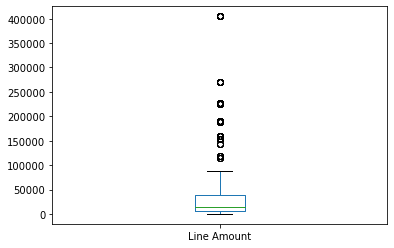

In [19]:

df["Line Amount"].plot(kind = "box")

In [16]:
df.describe()

,Sl. No.,Purchase Price,Line Amount,Quantity,Physical cost amount,Financial cost amount,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Invoice\nQTY,Differnce\nin QTY,Invoice\nCost Price,Differnce\nin Cost Price,Actual\nCost Amount,Diffence\nin Cost Amount in Invoice
count,1339.000000,1339.000000,1339.000000,1341.000000,1.341000e+03,1.333000e+03,28.000000,29.000000,28.000000,28.000000,28.000000,28.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,584.321135,45.492114,40574.155765,1306.240119,1.173730e+04,1.177395e+04,132.250000,-9.551724,33.821429,-13.500000,4018.285714,-746.714286,7930.032609,-1201.119565,3.503804,-2.342717,43597.415217,-37610.652174
std,377.061417,41.838139,66894.994052,18467.146496,2.003640e+05,2.003485e+05,118.847436,127.846612,46.030830,60.075416,11192.092657,10742.048496,10242.022528,4965.602830,3.532109,3.681495,108162.205081,104835.390723
min,1.000000,0.000000,40.000000,-800.000000,-1.800000e+03,4.000000e+01,8.000000,-400.000000,8.000000,-118.500000,-2560.000000,-45065.000000,150.000000,-24000.000000,0.250000,-21.200000,62.500000,-595750.000000
25%,243.500000,22.000000,5500.000000,51.000000,2.080000e+03,2.090000e+03,98.750000,-50.000000,17.750000,-25.750000,315.000000,62.500000,1500.000000,-2000.000000,1.825000,-2.352500,2675.000000,-20676.250000
50%,578.000000,38.000000,13870.000000,127.000000,4.088000e+03,4.130000e+03,100.000000,0.000000,22.000000,-8.250000,1900.000000,2332.500000,3000.000000,-175.000000,2.350000,-1.100000,6862.500000,-2488.000000
75%,912.500000,52.000000,39600.000000,275.000000,7.260000e+03,7.266000e+03,180.000000,70.000000,27.500000,0.750000,2800.000000,4169.250000,10250.000000,994.000000,3.500000,-0.450000,26637.500000,-173.000000
max,1247.000000,180.000000,405000.000000,619060.000000,7.319076e+06,7.296556e+06,600.000000,290.000000,250.000000,203.500000,59015.000000,8432.000000,49000.000000,18000.000000,21.200000,1.400000,612000.000000,5075.000000


<AxesSubplot:ylabel='Frequency'>

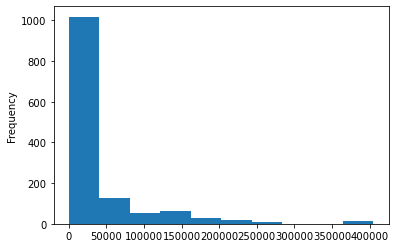

In [20]:
df["Line Amount"].plot(kind = "hist")

In [141]:
df["Line Amount"].value_counts()

88000.0     41
159600.0    27
22800.0     26
190000.0    23
153300.0    23
            ..
1989.0       1
5130.0       1
3990.0       1
1190.0       1
2222.0       1
Name: Line Amount, Length: 361, dtype: int64

In [143]:
df.sort_values(by = ["Name","Line Amount"]) 

,Sl. No.,Invoice,Name,Document Date,Packing slip,Batch number,Product Receipt Date,Item number,Unit,Financial date,...,Purchase Price,Currency,Line Amount,Item Description,Warehouse,Location,Quantity,Physical cost amount,Financial cost amount,source
1169,1170.0,P916,Forza Industries P Ltd,2020-02-26,P916,200229-00132,2020-02-28,P00000754-00,Nos,2020-03-13,...,8.00,INR,40.0,Top cover LID Carton for TP159D/E Drawing # - ...,REC-WH,RX-EMS,5,40.0,40.0,Forza
154,155.0,P638,Forza Industries P Ltd,2019-10-09,P638,191031-00158,2019-10-10,P00000269-P6,Nos,2019-11-04,...,95.00,INR,95.0,Master carton BOX 7Ply for Intellihot Tol=5mm ...,REC-WH,RX-EMS,1,95.0,95.0,Forza
1014,1015.0,P 495,Forza Industries P Ltd,NaT,P 495,180831-00087,NaT,P00000224-T5,Nos,2018-08-31,...,20.00,INR,100.0,"Outer PACK Box, Brown,-3ply",REC-WH,RX-EMS,5,100.0,100.0,Forza
1166,1167.0,P916,Forza Industries P Ltd,2020-02-26,P916,200229-00131,2020-02-28,P00000258-P6,Nos,2020-03-13,...,12.00,INR,120.0,Partition Addon card,REC-WH,RX-EMS,10,120.0,120.0,Forza
114,115.0,P 545,Forza Industries P Ltd,NaT,P 545,180922-00006,NaT,P00000725-00,Nos,2018-09-28,...,123.00,INR,123.0,Outer Carton Box for Cyan Interface (470X420X4...,REC-WH,RX-EMS,1,123.0,123.0,Forza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83.0,1027,Indujaa Press Components,2017-06-14,1027,170821-00050,2017-06-17,REH007050-PQ,Nos,2017-08-31,...,0.65,INR,32500.0,Terminal Tag 42343PS,REC-WH,RX-EMS,25000,16250.0,16250.0,induja
71,72.0,G59,Indujaa Press Components,2018-03-05,G59,180611-00002,2018-03-14,REH007050-PQ,Nos,2018-06-13,...,0.65,INR,32650.8,Terminal Tag 42343PS,REC-WH,RX-EMS,10232,6650.8,6650.8,induja
88,89.0,1181,Indujaa Press Components,2018-03-05,1181,180409-00095,2018-03-14,REH007050-PQ,Nos,2018-04-11,...,0.65,INR,32650.8,Terminal Tag 42343PS,REC-WH,RX-EMS,40000,26000.0,26000.0,induja
1247,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,256774,7319076.5,7296556.5,Forza


In [144]:
df.loc[df["Line Amount"] == 0.000000,"Line Amount"] = np.NaN

In [145]:
df["Line Amount"].isna().sum()

2